In [216]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('student-por.csv')

data['average_grade'] = data[['G1', 'G2', 'G3']].mean(axis=1)
quantiles = data['average_grade'].quantile([0.25, 0.5, 0.75, 1.0]).values
bins = [0] + quantiles.tolist()
labels = ['Fail', 'Satisfactory', 'Good', 'Excellent']

data['GradeClass'] = pd.cut(data['average_grade'], bins=bins, labels=labels, include_lowest=True)
data = data.drop(columns=['G1', 'G2', 'G3'])

binary_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus']
for col in binary_columns:
    unique_values = data[col].unique()
    data[col] = data[col].map({unique_values[0]: 0, unique_values[1]: 1})

multi_category_columns = ['Mjob', 'Fjob', 'reason', 'guardian']
data = pd.get_dummies(data, columns=multi_category_columns, drop_first=True)

binary_yes_no_columns = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for col in binary_yes_no_columns:
    data[col] = data[col].map({'yes': 1, 'no': 0})

X = data.drop(columns=['GradeClass'])
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = data['GradeClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)





[[-0.73094388 -0.83337685  1.03169516 ... -0.53160953  0.65297291
  -0.25968098]
 [-0.73094388  1.19993734 -0.6114218  ... -0.53160953  0.65297291
  -0.25968098]
 [-0.73094388  1.19993734  1.03169516 ... -0.53160953  0.65297291
  -0.25968098]
 ...
 [-0.73094388  1.19993734 -0.6114218  ... -0.53160953  0.65297291
  -0.25968098]
 [ 1.36809408 -0.83337685 -1.43298028 ...  1.88107989 -1.53145709
  -0.25968098]
 [-0.73094388  1.19993734 -1.43298028 ... -0.53160953  0.65297291
  -0.25968098]]


[[ 1.16516453 -1.19579789 -1.03783358 ... -1.22053921 -1.22585673
   0.72282174]
 [ 2.83273754  4.96570779  1.30617025 ... -0.32797703  0.33230903
  -0.45679244]
 [-0.27607972 -1.73602854  0.34111972 ... -1.72005992  0.6091248
   0.73204773]
 ...
 [ 2.75411571  1.93690273 -1.22855125 ...  0.01109329  0.74059517
   0.02420444]
 [-0.65625303 -0.61722388 -2.55195673 ...  0.502915    1.01816447
  -1.00002985]
 [ 2.45854082  0.97787124  0.35230963 ... -0.60776351  2.10709173
   1.04594724]]
KMeans Model Evaluation:
Accuracy: 0.4230769230769231
Precision: 0.3149439426969792
Recall: 0.4230769230769231
F1-Score: 0.36098082247594704


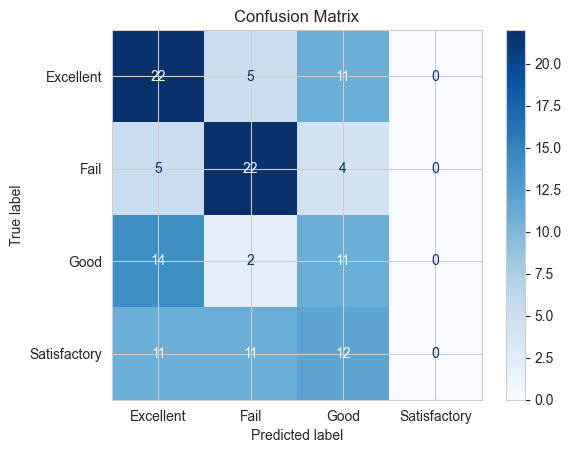

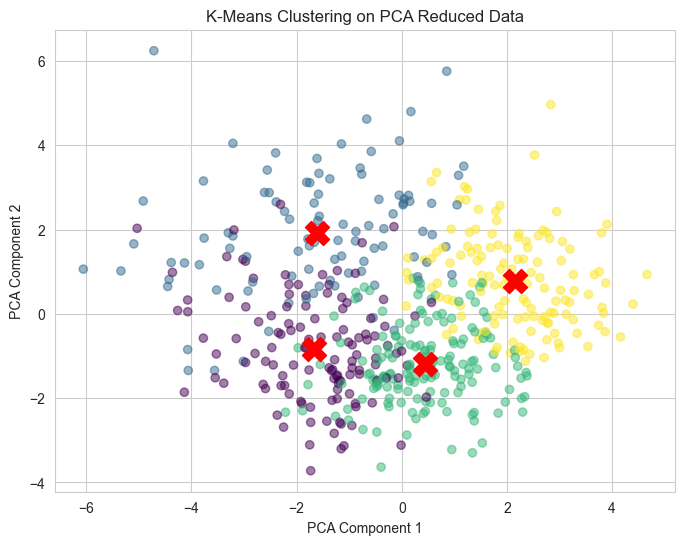

In [218]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# Define the K-Means Classifier
class KMeansClassifier:
    def __init__(self, n_clusters, random_state=42):
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
        self.cluster_labels = None  # To store the label for each cluster centroid

    def fit(self, X_train, y_train):
        # Perform K-Means clustering on the training data
        self.kmeans.fit(X_train)

        # Get cluster assignments for the training data
        train_clusters = self.kmeans.labels_

        # Assign a label to each cluster based on majority voting
        self.cluster_labels = {}
        for cluster_id in range(self.kmeans.n_clusters):
            # Get the labels of points in the current cluster
            cluster_points_labels = y_train[train_clusters == cluster_id]

            # Check if the cluster has any points
            if len(cluster_points_labels) > 0:
                # Find the most common label in the cluster
                most_common_label = Counter(cluster_points_labels).most_common(1)[0][0]
                self.cluster_labels[cluster_id] = most_common_label
            else:
                # If the cluster is empty, assign a default label (e.g., the most common label in the dataset)
                self.cluster_labels[cluster_id] = Counter(y_train).most_common(1)[0][0]

    def predict(self, X_test):
        # Assign clusters to the test data
        test_clusters = self.kmeans.predict(X_test)

        # Predict the label for each test point based on its cluster
        y_pred = [self.cluster_labels[cluster_id] for cluster_id in test_clusters]
        return np.array(y_pred)


# Example Dataset (Replace with your actual dataset)
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# # Generate a synthetic dataset with high dimensionality
# X, y = make_classification(n_samples=500, n_features=50, n_classes=4, n_clusters_per_class=1, random_state=42)
#
# # Split the dataset into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Reduce dimensionality using PCA
pca = PCA(n_components=20)  # Reduce to 2 dimensions for visualization
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca)

# 3. Initialize the K-Means Classifier
n_clusters = len(np.unique(y))  # Use the number of unique labels as the number of clusters
kmeans_clf = KMeansClassifier(n_clusters=n_clusters)

# 4. Train the K-Means Classifier
kmeans_clf.fit(X_train_pca, y_train)

# 5. Predict on the test set
y_pred_kmeans = kmeans_clf.predict(X_test_pca)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred_kmeans)
precision = precision_score(y_test, y_pred_kmeans, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_kmeans, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred_kmeans, average='weighted', zero_division=0)

# Print evaluation results
print(f"KMeans Model Evaluation:\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {f1}")

# 7. Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_kmeans)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 8. Visualize the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans_clf.kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_clf.kmeans.cluster_centers_[:, 0], kmeans_clf.kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title("K-Means Clustering on PCA Reduced Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

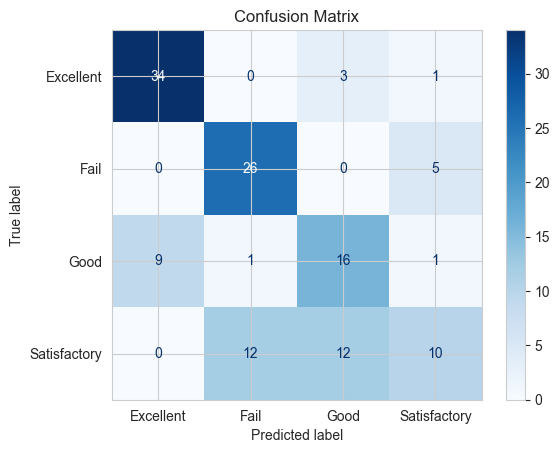

In [219]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

pca = PCA(n_components=30)  # 保留 30 个主成分
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 3. 超参数优化
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train_pca, y_train)

# 输出最佳参数
print(f"Best Parameters: {grid.best_params_}")

# 4. 使用最佳参数训练 SVM 模型
svm_model = grid.best_estimator_
y_pred_svm = svm_model.predict(X_test_pca)

# 5. 模型评估
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_svm, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred_svm, average='weighted', zero_division=0)

print(f"SVM Model Evaluation:\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {f1}")

# 6. 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Logistic Regression Model Evaluation:
Accuracy: 0.5538461538461539
Precision: 0.5334523106901623
Recall: 0.5538461538461539
F1-Score: 0.5321755847149104


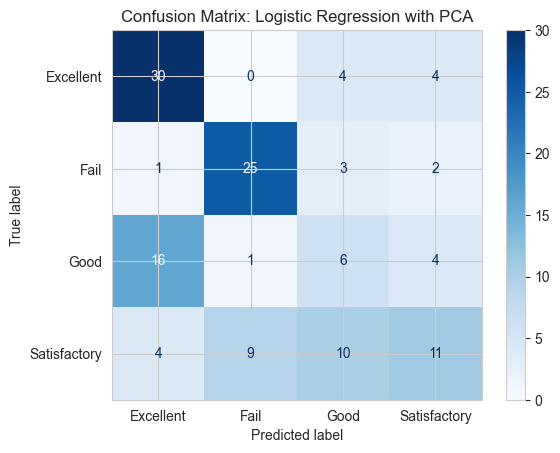

In [220]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


# 使用 PCA 降维
pca = PCA(n_components=20)  # 保留 10 个主成分（可调整）
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 处理类别不平衡（可选，如果类别不平衡严重）
smote = SMOTE(random_state=42)
X_train_pca_resampled, y_train_resampled = smote.fit_resample(X_train_pca, y_train)

# 训练逻辑回归模型（带正则化）
logistic_model = LogisticRegression(
    solver='liblinear', penalty='l1', max_iter=10000, random_state=42
)
logistic_model.fit(X_train_pca_resampled, y_train_resampled)

# 测试集预测
y_pred_logistic = logistic_model.predict(X_test_pca)

# 模型评估
accuracy = accuracy_score(y_test, y_pred_logistic)
precision = precision_score(y_test, y_pred_logistic, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_logistic, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred_logistic, average='weighted', zero_division=0)

print(f"Logistic Regression Model Evaluation:\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {f1}")

# 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Logistic Regression with PCA")
plt.show()


In [222]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Define labels and their mapping to numeric values
labels = ['Fail', 'Satisfactory', 'Good', 'Excellent']
label_mapping = {label: idx for idx, label in enumerate(labels)}  # Map to 0, 1, 2, 3, 4
print(y_train)
# Convert string labels to numeric values
y_train_numeric = [label_mapping[label] for label in y_train]
y_test_numeric = [label_mapping[label] for label in y_test]

print(y_train_numeric)



332       Excellent
29     Satisfactory
302    Satisfactory
286            Good
554    Satisfactory
           ...     
71             Fail
106            Fail
270       Excellent
435            Fail
102            Good
Name: GradeClass, Length: 519, dtype: category
Categories (4, object): ['Fail' < 'Satisfactory' < 'Good' < 'Excellent']
[3, 1, 1, 2, 1, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 2, 2, 3, 2, 3, 0, 0, 3, 2, 0, 2, 3, 1, 2, 2, 3, 0, 1, 0, 3, 2, 0, 0, 1, 1, 2, 3, 2, 0, 1, 3, 0, 0, 2, 3, 3, 3, 1, 0, 1, 3, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 2, 1, 1, 2, 3, 0, 2, 3, 2, 0, 3, 1, 3, 0, 0, 2, 2, 0, 0, 0, 1, 2, 1, 3, 2, 1, 1, 2, 3, 3, 3, 0, 1, 1, 1, 3, 0, 0, 2, 0, 3, 3, 3, 2, 0, 0, 2, 2, 3, 3, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 2, 1, 0, 3, 2, 2, 2, 1, 0, 3, 0, 3, 3, 0, 0, 0, 1, 0, 3, 1, 1, 0, 1, 3, 0, 1, 0, 0, 1, 2, 3, 2, 0, 3, 2, 1, 3, 0, 3, 2, 2, 0, 3, 1, 1, 3, 0, 3, 2, 0, 3, 2, 2, 0, 3, 3, 0, 2, 2, 2, 3, 0, 2, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 3, 0, 3, 3, 0, 3, 2, 2, 2, 1, 3, 0, 2, 3,

In [223]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_numeric, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_numeric, dtype=torch.long)
print(X_train_tensor.shape)
print(X_test_tensor.shape)
print(y_train_tensor.shape)
print(y_test_tensor.shape)


torch.Size([519, 40])
torch.Size([130, 40])
torch.Size([519])
torch.Size([130])


Epoch [100/1000], Loss: 0.7400, Learning Rate: 0.001000
Epoch [200/1000], Loss: 0.4117, Learning Rate: 0.001000
Epoch [300/1000], Loss: 0.2803, Learning Rate: 0.001000
Epoch [400/1000], Loss: 0.1956, Learning Rate: 0.001000
Epoch [500/1000], Loss: 0.1257, Learning Rate: 0.001000
Epoch [600/1000], Loss: 0.0871, Learning Rate: 0.001000
Epoch [700/1000], Loss: 0.0864, Learning Rate: 0.001000
Epoch [800/1000], Loss: 0.0745, Learning Rate: 0.001000
Epoch [900/1000], Loss: 0.0710, Learning Rate: 0.001000
Epoch [1000/1000], Loss: 0.0566, Learning Rate: 0.001000
Neural Network Model Evaluation:
Accuracy: 0.6923
Precision: 0.6862
Recall: 0.6923
F1-Score: 0.6812
y_test_numeric unique values: [0 1 2 3]
y_pred unique values: [0 1 2 3]


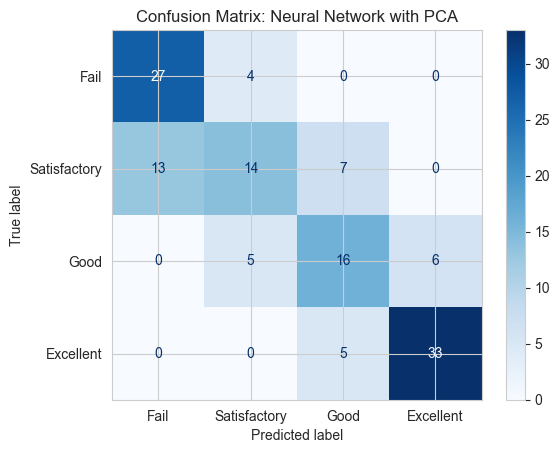

In [225]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# PCA 降维
pca = PCA(n_components=30)  # 降到 20 个主成分（可根据数据调整）
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 转换为 PyTorch 张量
X_train_tensor = torch.tensor(X_train_pca, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_numeric, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_pca, dtype=torch.float32)
y_test_numeric = np.array(y_test_numeric)

class ImprovedNeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes):
        super(ImprovedNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(32, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x


input_size = X_train_pca.shape[1]
num_classes = len(labels)
model = ImprovedNeuralNetwork(input_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)  # 初始学习率为 0.001

# 定义学习率调度器
scheduler = StepLR(optimizer, step_size=7000, gamma=0.1)  # 每 1000 个 epoch 将学习率乘以 0.1

# 训练循环
num_epochs = 1000 # 总训练轮数
for epoch in range(num_epochs):
    model.train()

    # 前向传播
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 更新学习率
    scheduler.step()

    # 打印每个 epoch 的损失和当前学习率
    if (epoch + 1) % 100 == 0:
        current_lr = optimizer.param_groups[0]['lr']
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Learning Rate: {current_lr:.6f}")

# 模型评估
model.eval()
with torch.no_grad():
    y_pred_probs = model(X_test_tensor)
    y_pred = torch.argmax(y_pred_probs, dim=1).numpy()

# 计算评估指标
accuracy = accuracy_score(y_test_numeric, y_pred)
precision = precision_score(y_test_numeric, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test_numeric, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test_numeric, y_pred, average='weighted', zero_division=0)

# 打印评估结果
print(f"Neural Network Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("y_test_numeric unique values:", np.unique(y_test_numeric))
print("y_pred unique values:", np.unique(y_pred))

# 混淆矩阵
conf_matrix = confusion_matrix(y_test_numeric, y_pred)

# 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Neural Network with PCA")
plt.show()


Epoch [100/2000], Loss: 0.5071, Val Loss: 0.9496, Learning Rate: 0.001000
Early stopping at epoch 115
Neural Network Model Evaluation:
Accuracy: 0.5846
Precision: 0.5446
Recall: 0.5846
F1-Score: 0.5450


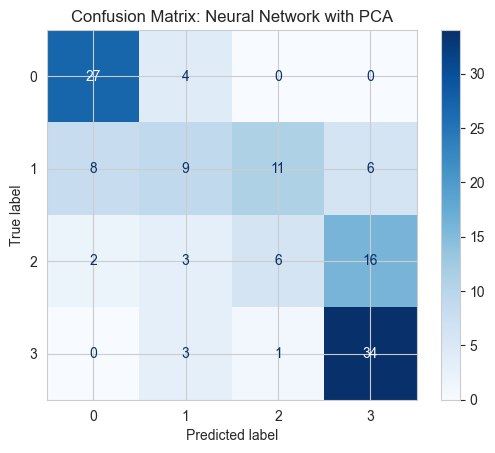

In [226]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# 数据预处理（假设 X_train, X_test, y_train_numeric, y_test_numeric 已经准备好）

# PCA 降维
pca = PCA(n_components=30)  # 主成分数量（可调整）
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 转换为 PyTorch 张量
X_train_tensor = torch.tensor(X_train_pca, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_numeric, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_pca, dtype=torch.float32)
y_test_numeric = np.array(y_test_numeric)

# 定义神经网络
class ImprovedNeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes, hidden_sizes=(128, 64), dropout_rate=0.3):
        super(ImprovedNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.bn1 = nn.BatchNorm1d(hidden_sizes[0])
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.bn2 = nn.BatchNorm1d(hidden_sizes[1])
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(hidden_sizes[1], num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# 设置参数
input_size = X_train_pca.shape[1]
num_classes = len(np.unique(y_train_numeric))  # 类别数量
hidden_sizes = (128, 64)  # 隐藏层大小（可调整）
dropout_rate = 0.3  # Dropout 比例
learning_rate = 0.001  # 初始学习率
weight_decay = 1e-3  # 权重衰减（L2 正则化）
step_size = 500  # 学习率调度器步长
gamma = 0.5  # 学习率衰减因子
num_epochs = 2000  # 总训练轮数
patience = 20  # 早停机制容忍次数

# 初始化模型、损失函数、优化器和学习率调度器
model = ImprovedNeuralNetwork(input_size, num_classes, hidden_sizes, dropout_rate)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
scheduler = StepLR(optimizer, step_size=step_size, gamma=gamma)

# 早停机制
best_loss = float('inf')
counter = 0

# 训练循环
for epoch in range(num_epochs):
    model.train()

    # 前向传播
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 更新学习率
    scheduler.step()

    # 验证集性能（用于早停机制）
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, torch.tensor(y_test_numeric, dtype=torch.long))

    # 检查是否早停
    if val_loss.item() < best_loss:
        best_loss = val_loss.item()
        counter = 0
        # 保存当前最优模型
        torch.save(model.state_dict(), "best_model.pth")
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    # 打印每个 epoch 的损失和当前学习率
    if (epoch + 1) % 100 == 0:
        current_lr = optimizer.param_groups[0]['lr']
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Learning Rate: {current_lr:.6f}")

# 加载最优模型
model.load_state_dict(torch.load("best_model.pth"))

# 模型评估
model.eval()
with torch.no_grad():
    y_pred_probs = model(X_test_tensor)
    y_pred = torch.argmax(y_pred_probs, dim=1).numpy()

# 计算评估指标
accuracy = accuracy_score(y_test_numeric, y_pred)
precision = precision_score(y_test_numeric, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test_numeric, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test_numeric, y_pred, average='weighted', zero_division=0)

# 打印评估结果
print(f"Neural Network Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# 混淆矩阵
conf_matrix = confusion_matrix(y_test_numeric, y_pred)

# 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test_numeric))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Neural Network with PCA")
plt.show()
